<a href="https://www.kaggle.com/code/youssifahmedthabet/laptop-price-prediction?scriptVersionId=155637323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load Dataset
df = pd.read_csv('/kaggle/input/laptop-price-prediction-dataset/data.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [3]:
# Summary
df.describe()

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,467.135498,521.382979,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,270.209769,299.916605,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,235.000000,265.000000,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,467.000000,531.000000,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,702.000000,784.000000,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [4]:
# info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

# Data Cleaning

In [5]:
# Check for missing values
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [7]:
# Drop rows with missing values
df = df.dropna()

# calc rows and colums in dataset
df.shape

(893, 18)

In [8]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

# outliers

<Axes: >

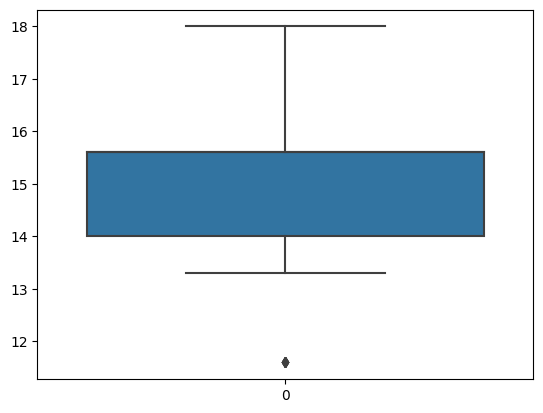

In [9]:
# Box Plot
import seaborn as sns
sns.boxplot(df['display_size'])

In [10]:
# IQR
Q1 = np.percentile(df['display_size'], 25, method='midpoint')
Q3 = np.percentile(df['display_size'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1.5999999999999996


In [11]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR
print(upper,lower)

18.0 11.600000000000001


In [12]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=list(np.where(df['display_size']>=upper))
print("upper Bound:",upper)
print(sum(upper_array))
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=list(np.where(df['display_size']<=lower))
print("Lower Bound:",lower)
print(sum(lower_array))

upper Bound: 18.0
[288]
Lower Bound: 11.600000000000001
[ 13 105 110 239 546 568 743]


Lower Bound : 13.29556133884478
Upper Bound : 17.051941460707287


<Axes: >

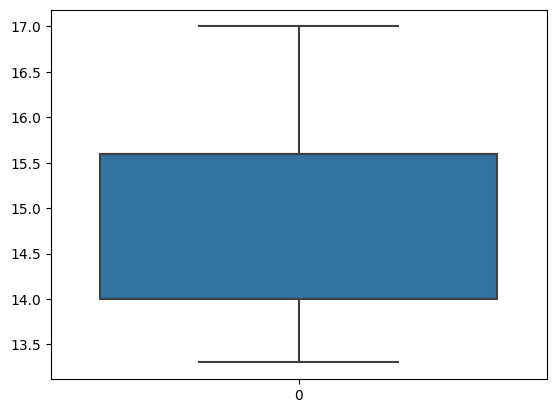

In [13]:
# calculate summary statistics
mean = df['display_size'].mean()
std  = df['display_size'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df = df[(df['display_size'] >= lower_bound) 
                & (df['display_size'] <= upper_bound)]
sns.boxplot(df['display_size'])

# Scaling and Normalization

In [14]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

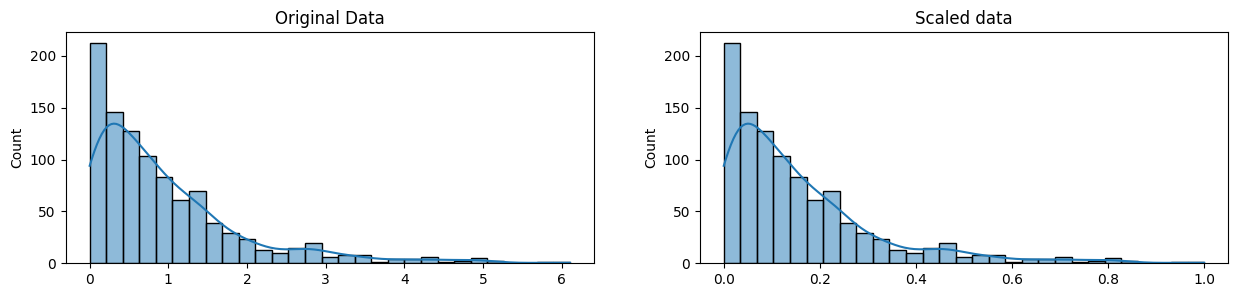

In [15]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

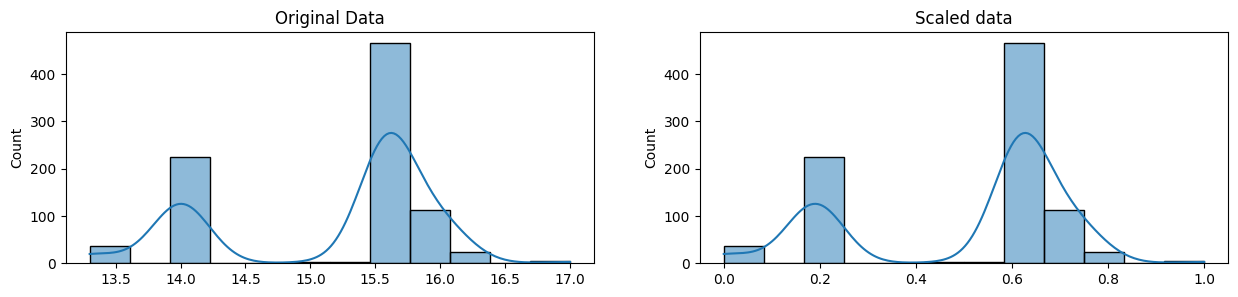

In [16]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = df['display_size'].to_numpy()

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

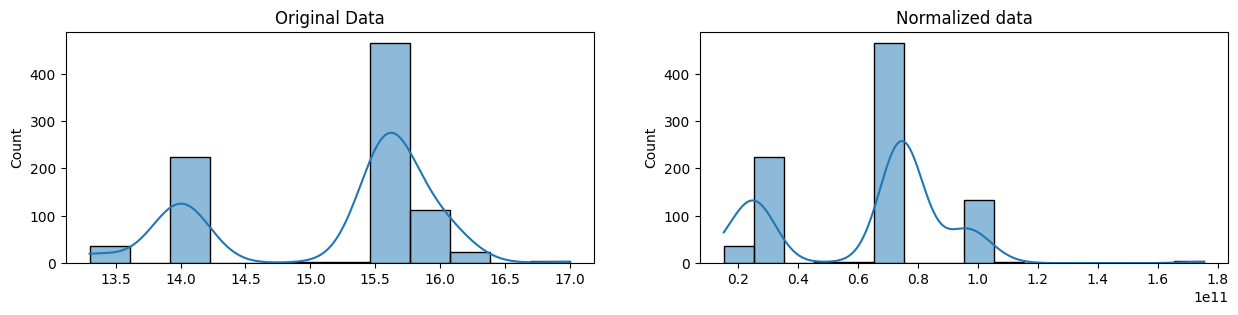

In [17]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

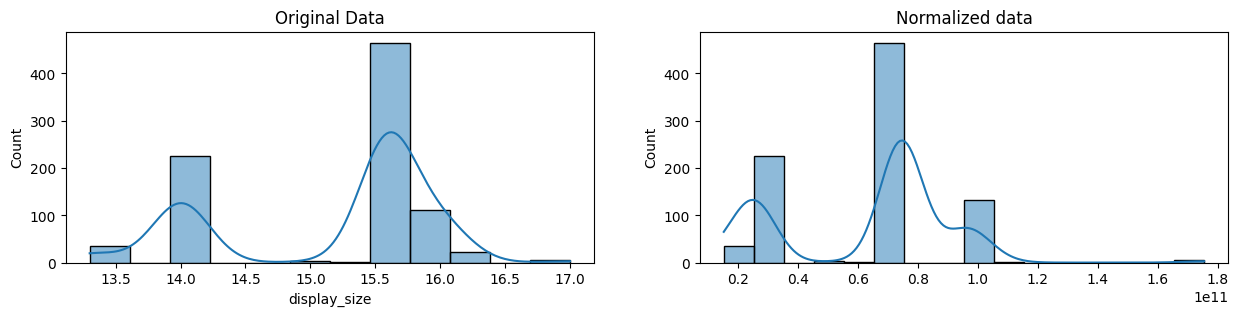

In [18]:
d=df['display_size']
postdata = d[d>0]
normalized_data = stats.boxcox(postdata)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(postdata, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# visualization

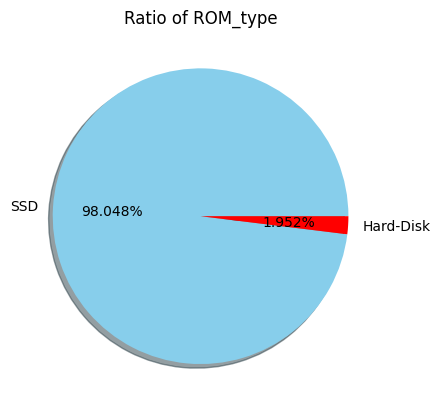

In [19]:
plt.pie(x = df['ROM_type'].value_counts() ,autopct='%1.3f%%' ,labels=['SSD', 'Hard-Disk'], colors=['skyblue', 'red'], shadow=True)
plt.title('Ratio of ROM_type')
plt.show()

<Axes: xlabel='ROM_type', ylabel='count'>

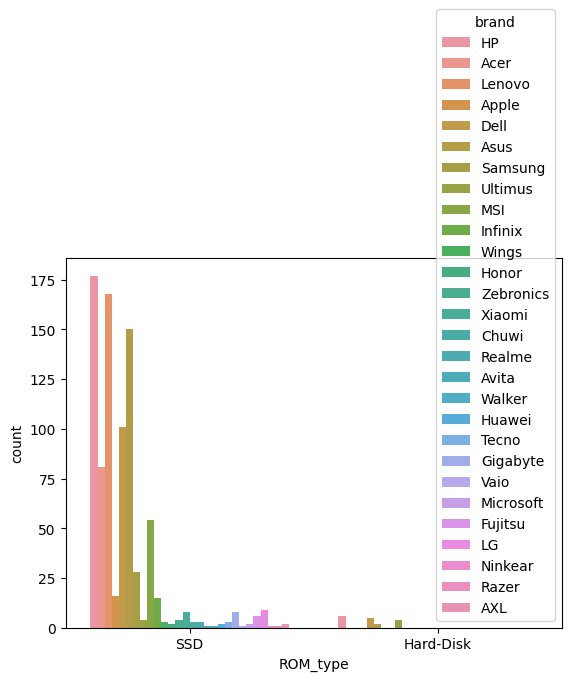

In [20]:
sns.countplot(x=df['ROM_type'],hue='brand',data=df)

In [21]:
df['brand'].value_counts()

brand
HP           183
Lenovo       168
Asus         152
Dell         106
Acer          81
MSI           58
Samsung       28
Apple         16
Infinix       15
LG             9
Xiaomi         8
Gigabyte       8
Fujitsu        6
Ultimus        4
Zebronics      4
Tecno          3
Chuwi          3
Realme         3
Wings          3
Huawei         2
Microsoft      2
Honor          2
AXL            2
Walker         1
Avita          1
Vaio           1
Ninkear        1
Razer          1
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='count'>

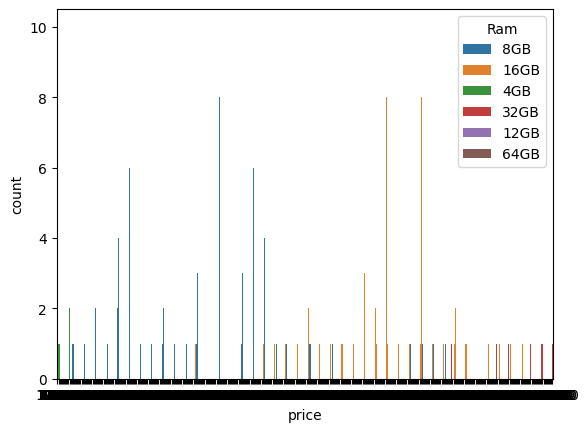

In [22]:
sns.countplot(x=df['price'],hue='Ram',data=df)

<Axes: xlabel='price', ylabel='Ram'>

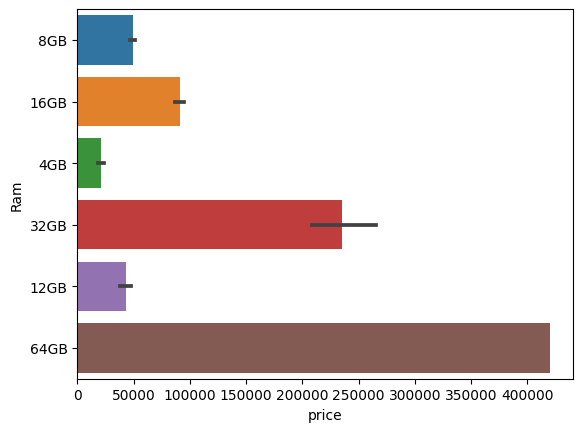

In [23]:
sns.barplot(x=df['price'],y=df['Ram'],data=df)

<Axes: xlabel='spec_rating', ylabel='CPU'>

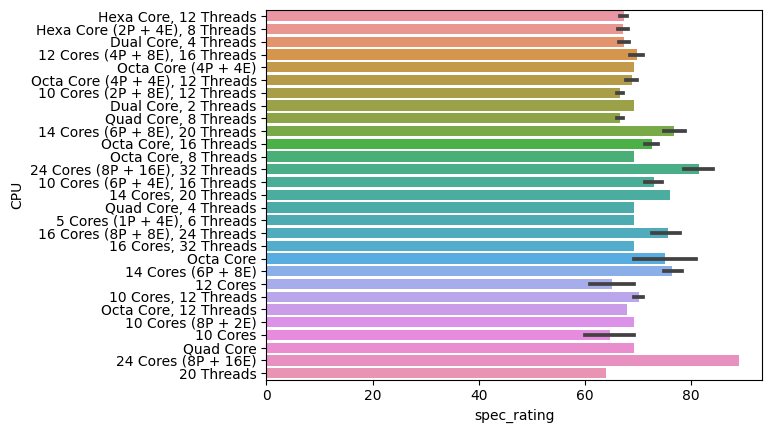

In [24]:
sns.barplot(x=df['spec_rating'],y=df['CPU'],data=df)

<Axes: xlabel='price'>

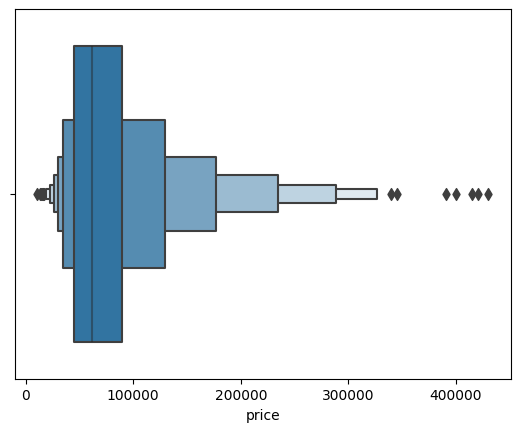

In [25]:
sns.boxenplot(data=df,x='price')

<Axes: xlabel='display_size'>

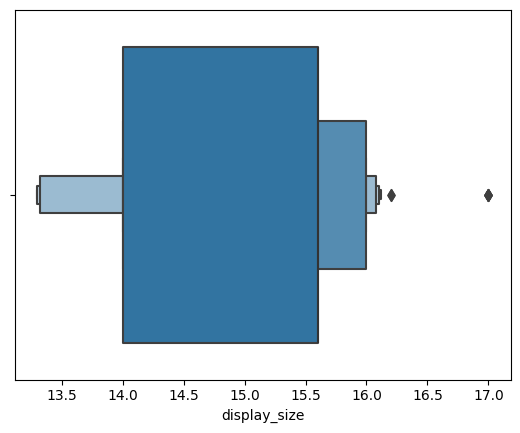

In [26]:
sns.boxenplot(data=df,x='display_size')

<Axes: xlabel='display_size', ylabel='OS'>

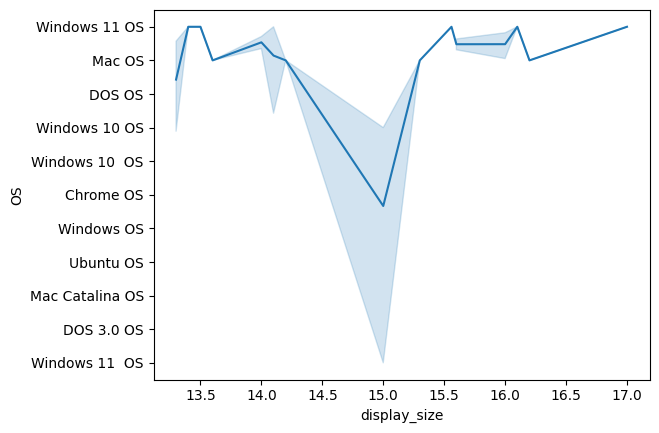

In [27]:
sns.lineplot(x=df['display_size'],y=df['OS'],data=df)

<Axes: xlabel='Ram', ylabel='CPU'>

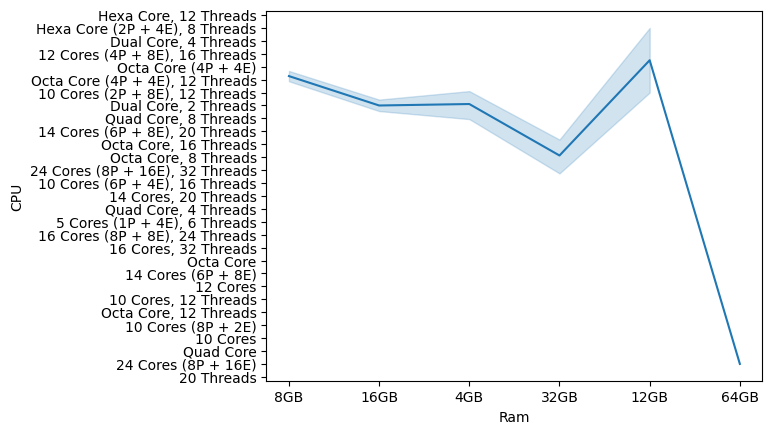

In [28]:
sns.lineplot(x=df['Ram'],y=df['CPU'],data=df) 

<Axes: xlabel='Ram', ylabel='price'>

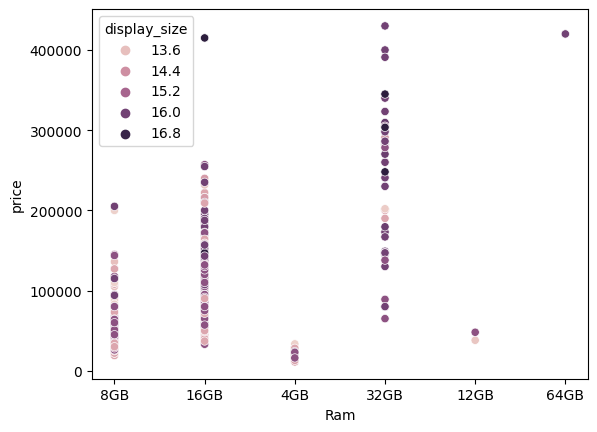

In [29]:
sns.scatterplot(x=df['Ram'],y=df['price'],hue=df['display_size'])

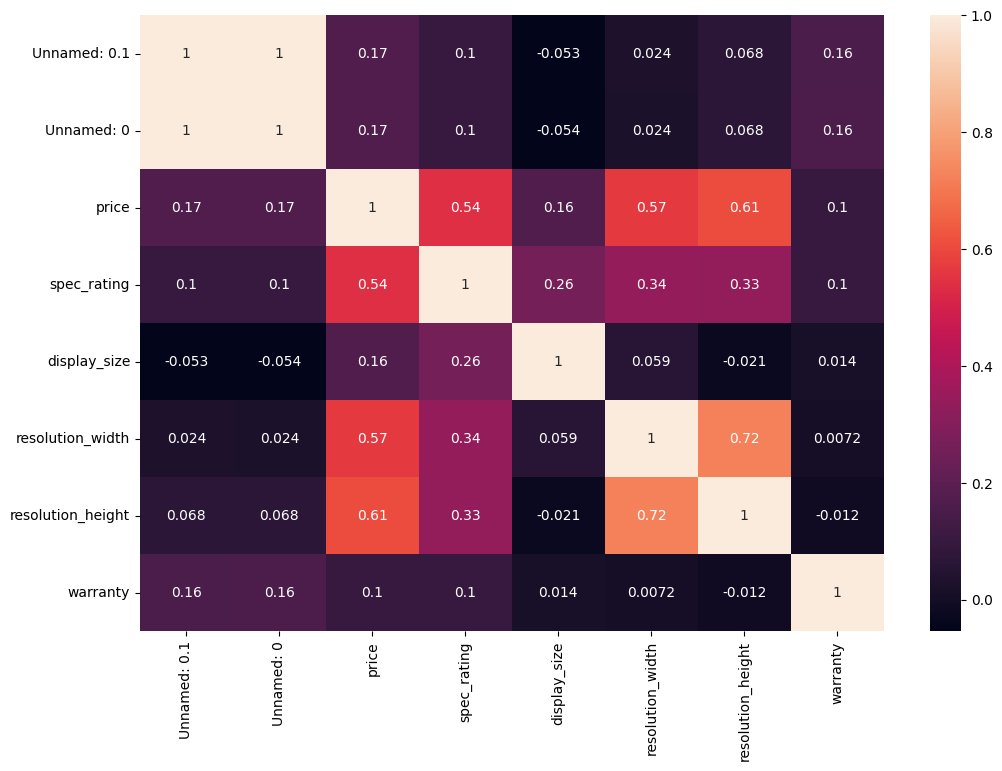

In [30]:
numeric_columns = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler

In [32]:
encoder = LabelEncoder()
encoder.fit(df['Ram_type'])
df['Ram_type']=encoder.transform(df['Ram_type'])

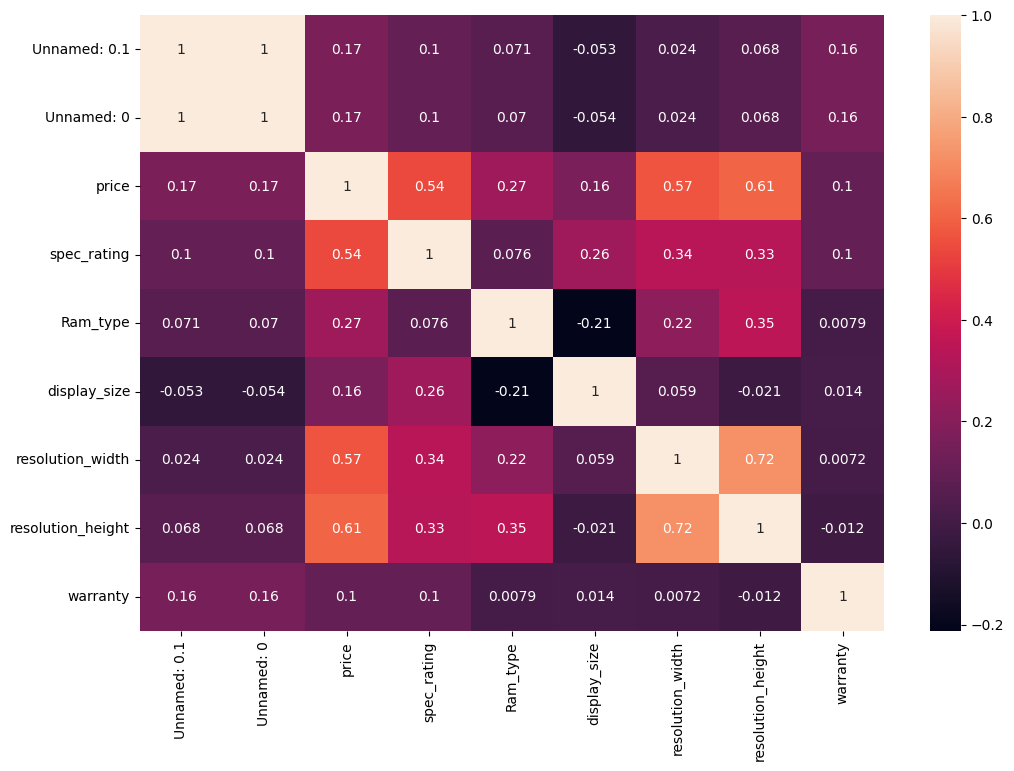

In [33]:
numeric_columns = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

In [34]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,2,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,2,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,2,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,8,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,2,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


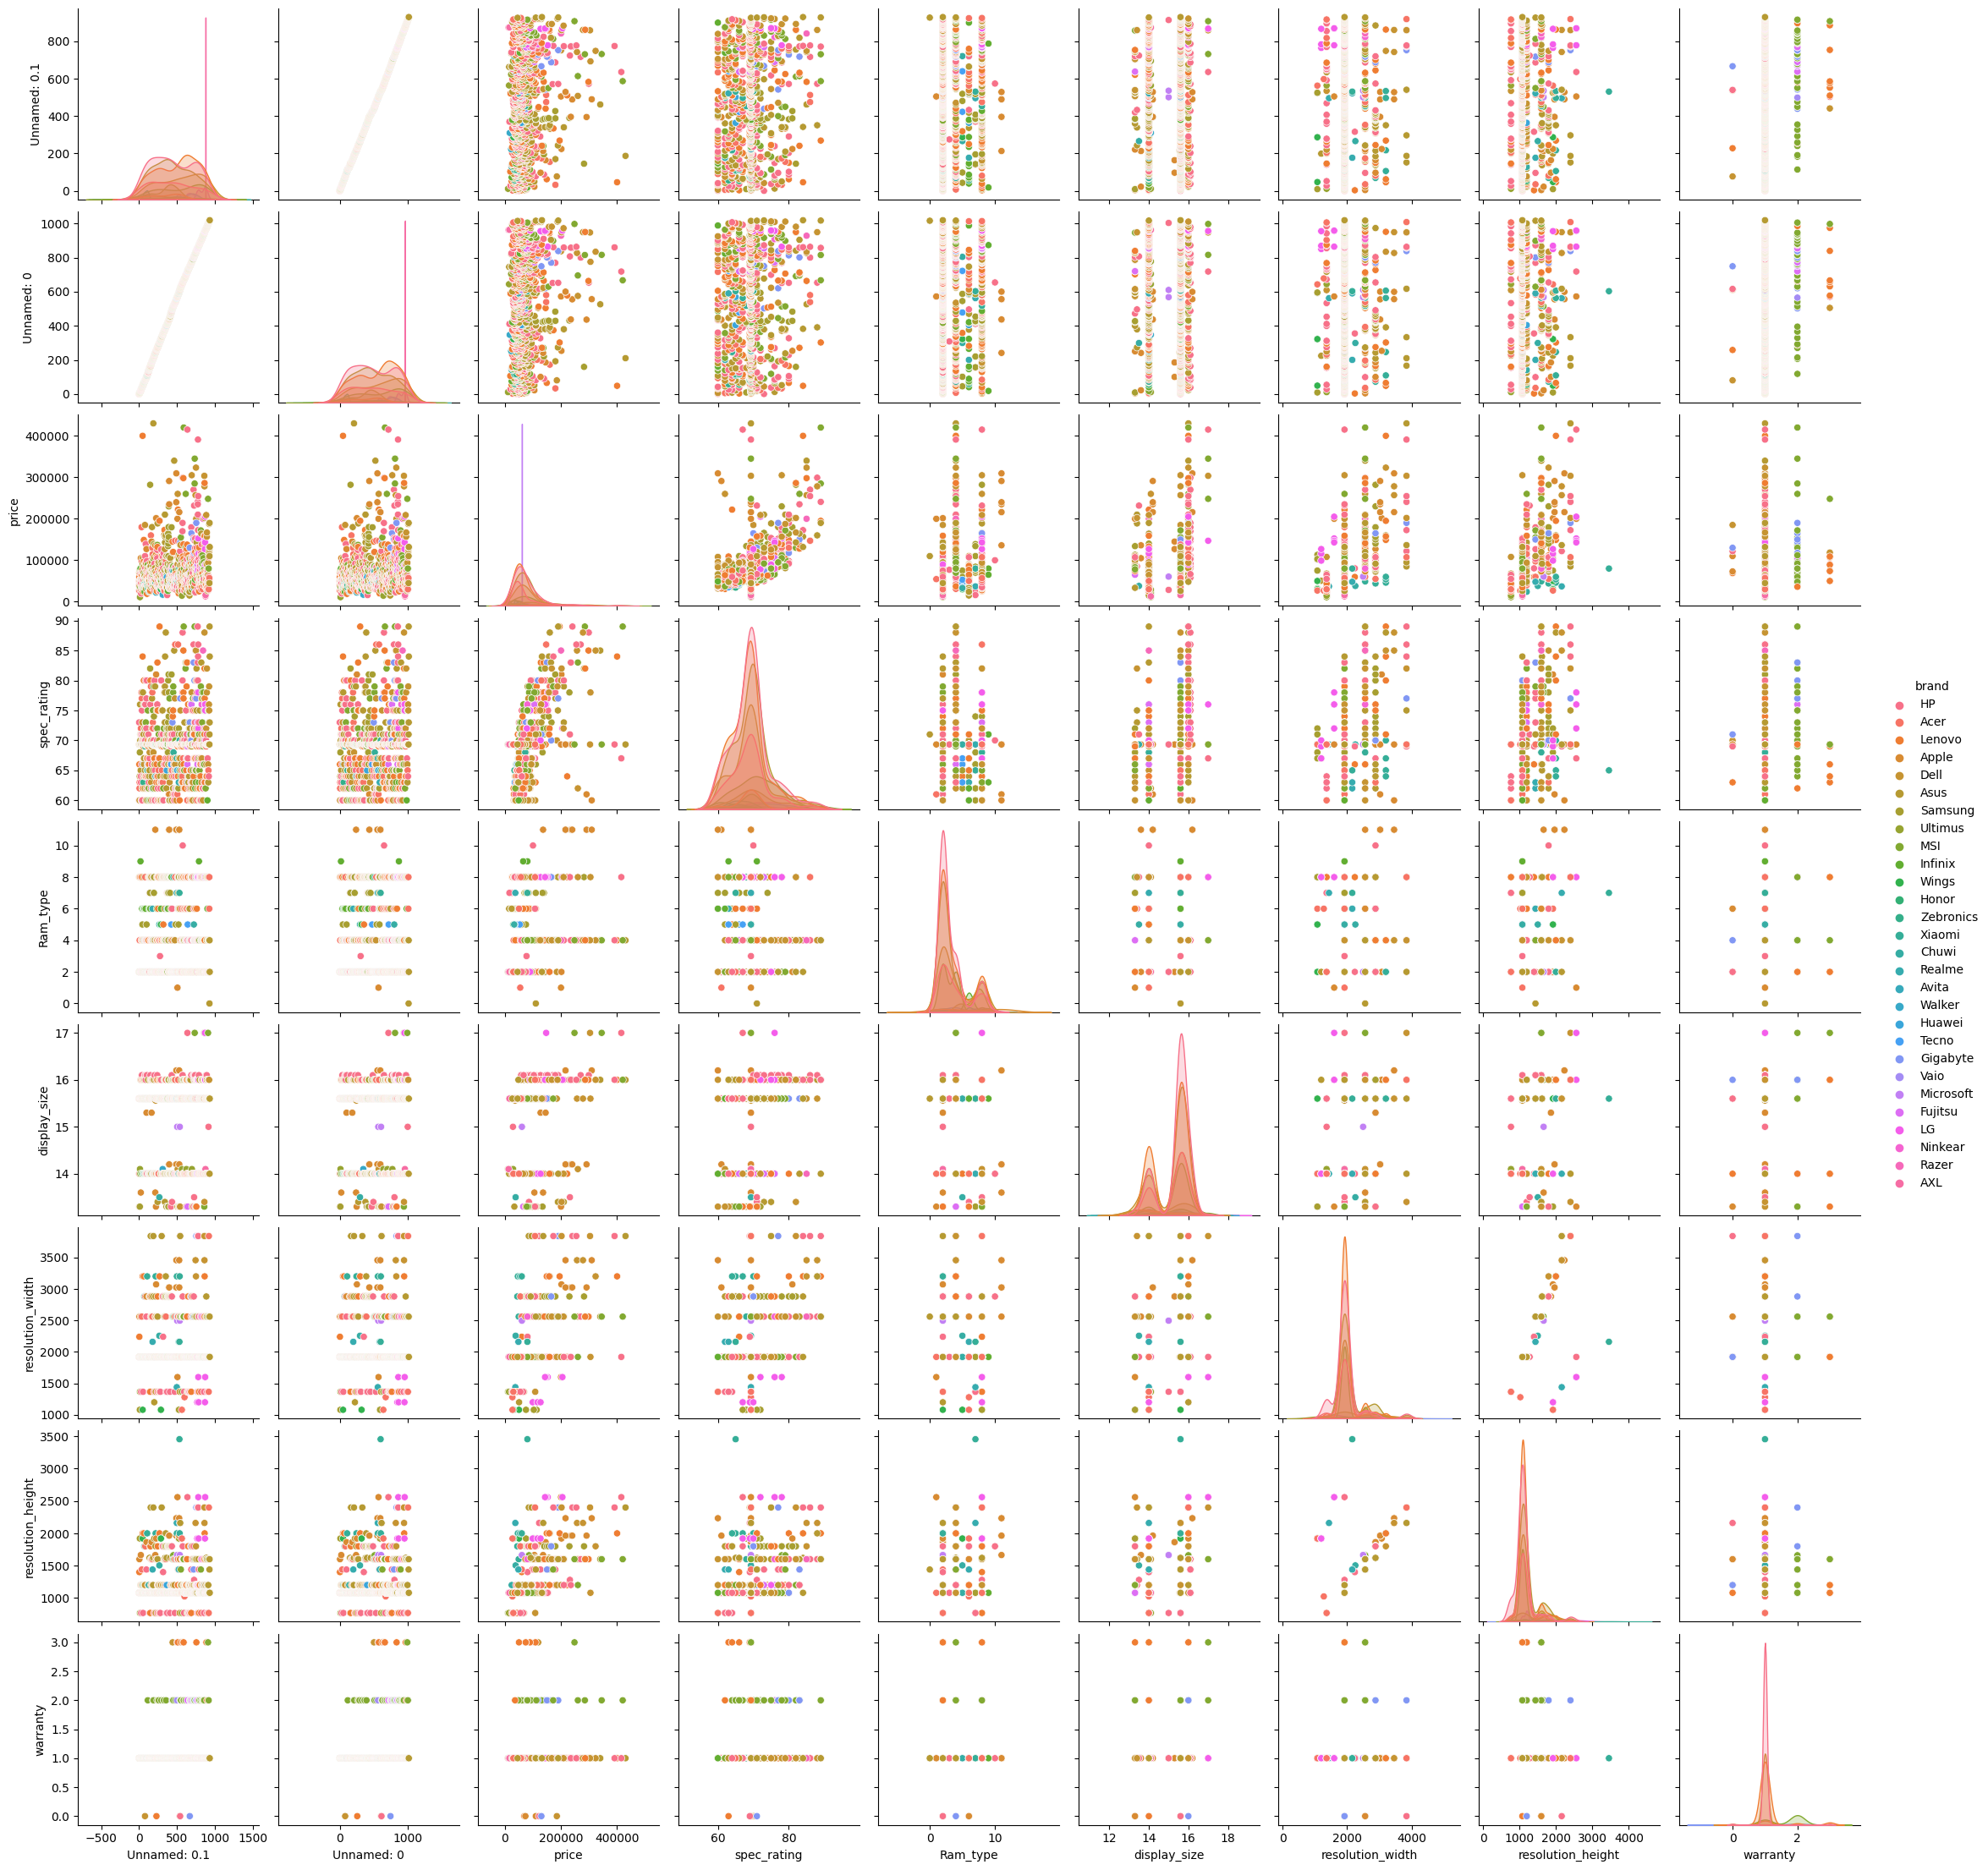

In [35]:
sns.pairplot(df,hue='brand')

<Axes: xlabel='spec_rating', ylabel='brand'>

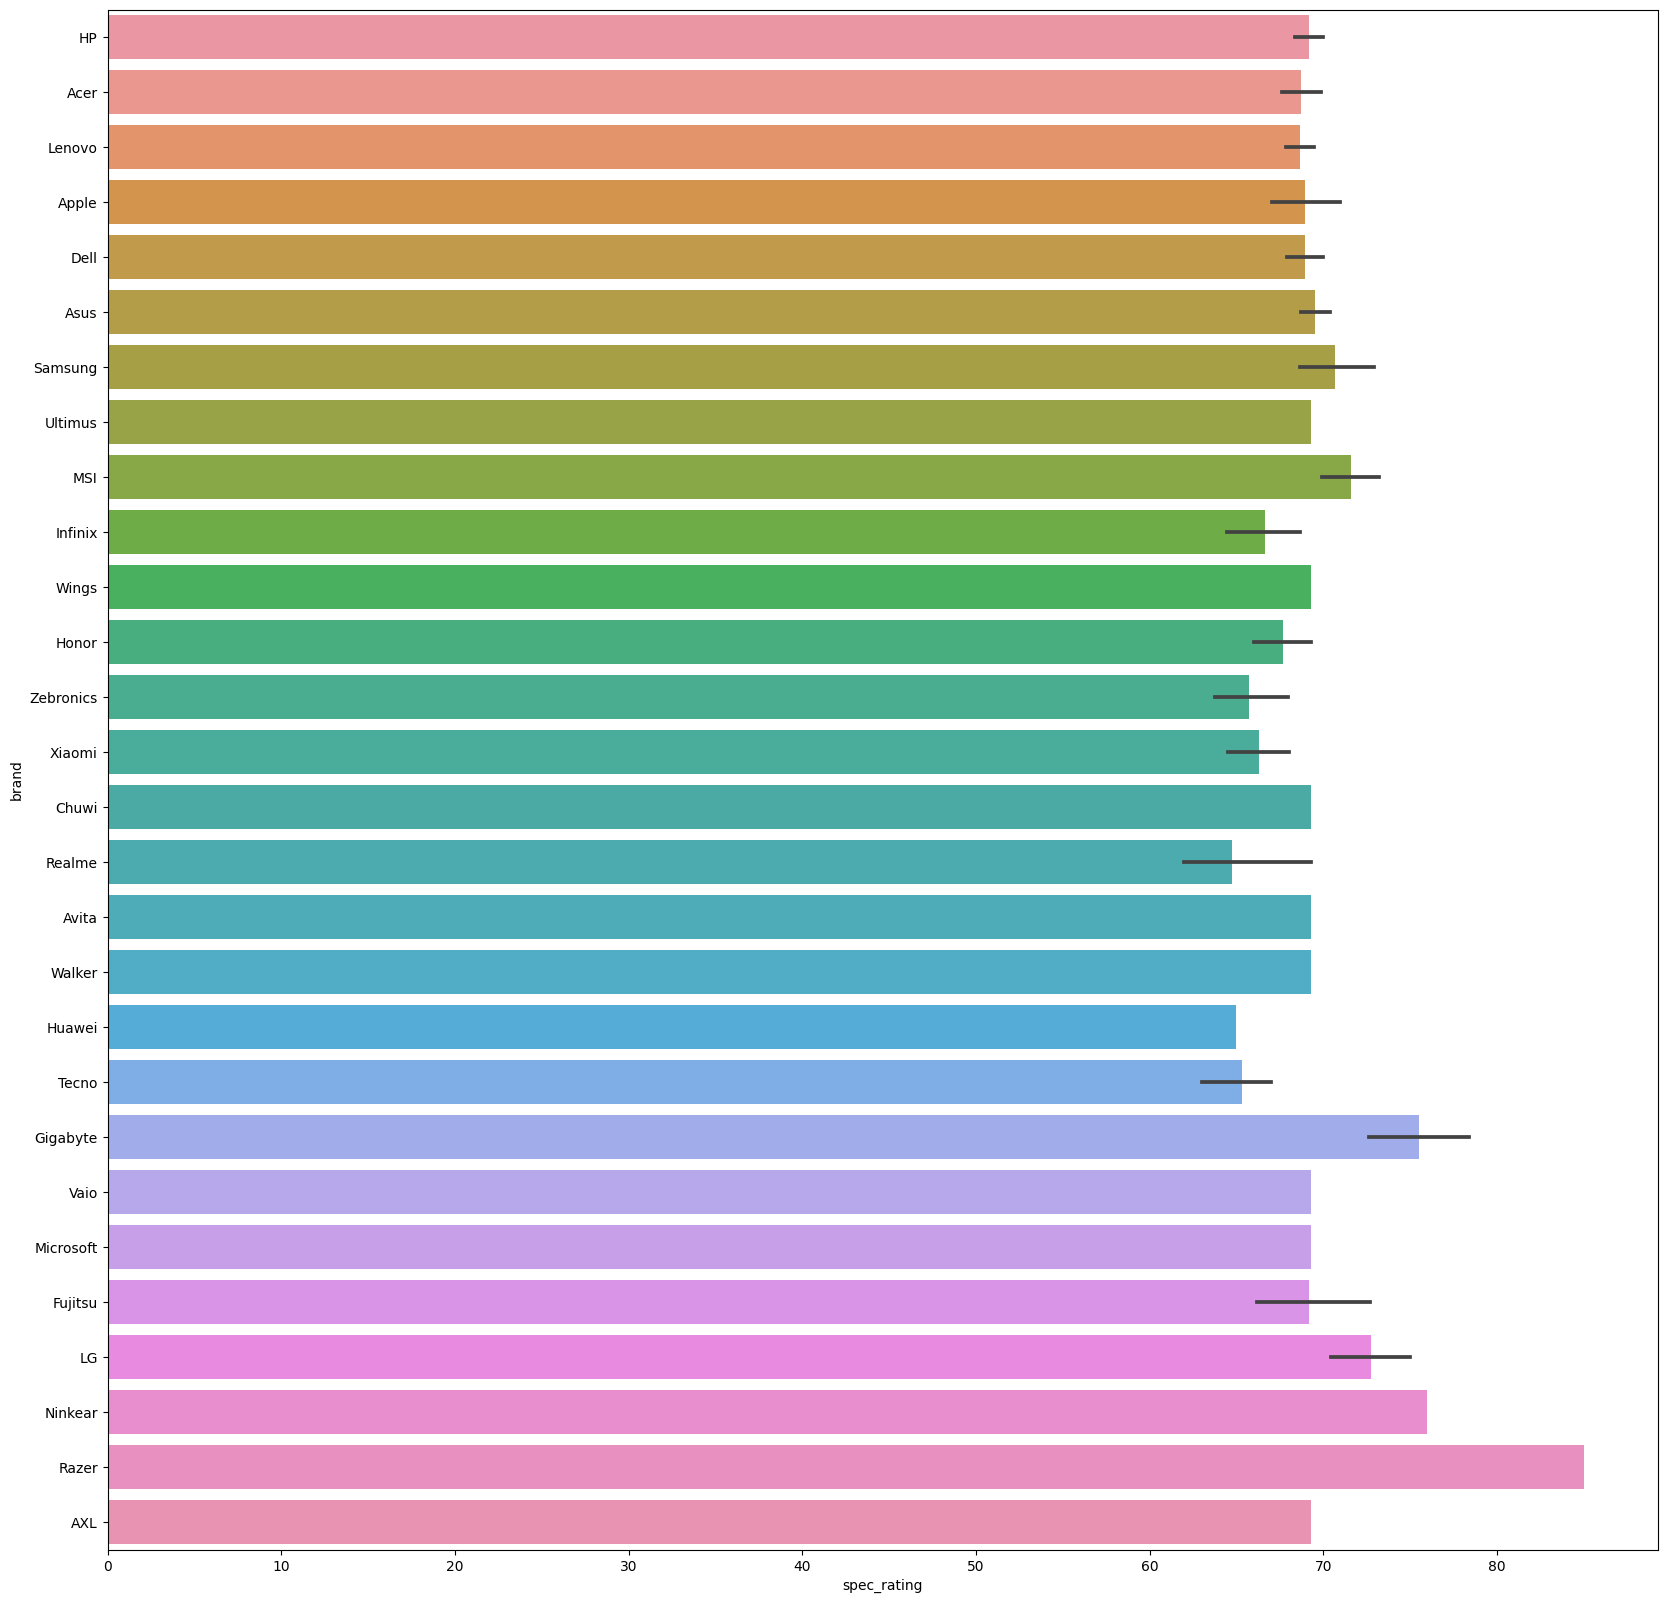

In [36]:
plt.figure(figsize=(20,20))
sns.barplot(data=df,y='brand',x='spec_rating')